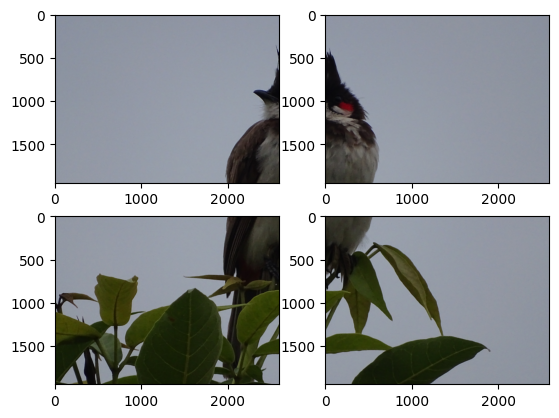

In [1]:
# Write program to read digital image. Split image into 4 quadrants.

import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('/content/DSC07750.JPG')
img_rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
h,w,channels=img.shape
cx=h//2
cy=w//2
tl=img_rgb[0:cx,0:cy]
tr=img_rgb[0:cx,cy:w]
bl=img_rgb[cx:h,0:cy]
br=img_rgb[cx:h,cy:w]
plt.subplot(221);plt.imshow(tl)
plt.subplot(222);plt.imshow(tr)
plt.subplot(223);plt.imshow(bl)
plt.subplot(224);plt.imshow(br)

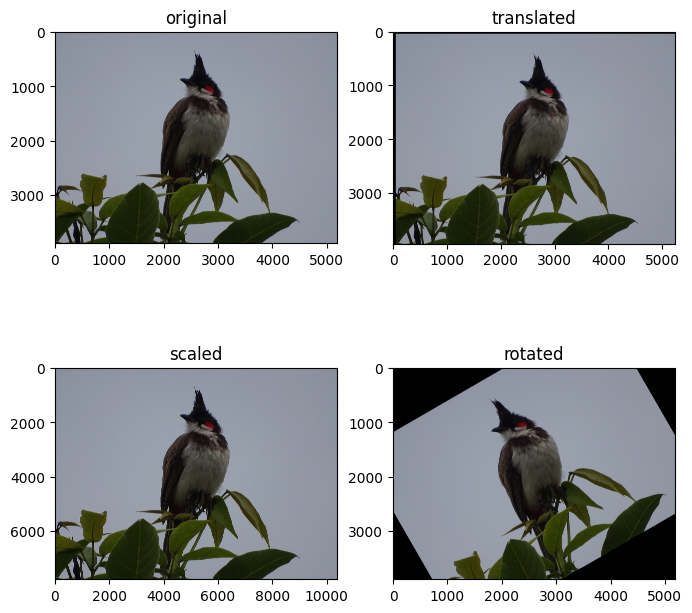

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread("/content/DSC07750.JPG")
image_mat=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ht,wd,c=image.shape
center=(wd/2,ht/2)

trans=np.float32([[1,0,50],[0,1,50]])
scale=np.float32([[2,0,0],[0,2,0]])
rotate=cv2.getRotationMatrix2D(center,30,1)

im_t=cv2.warpAffine(image_mat,trans,(wd+50,ht+50))
im_s=cv2.warpAffine(image_mat,scale,(wd*2,ht*2))
im_r=cv2.warpAffine(image_mat,rotate,(wd,ht))
fig,axs=plt.subplots(2,2)
l_title=["original","translated","scaled","rotated"]
l_var=[image_mat,im_t,im_s,im_r]
k=0
for i in range(2):
    for j in range(2):
       axs[i,j].imshow(l_var[k])
       axs[i,j].set_title(l_title[k])
       #axs[i,j].axis("off")
       k+=1
plt.show()

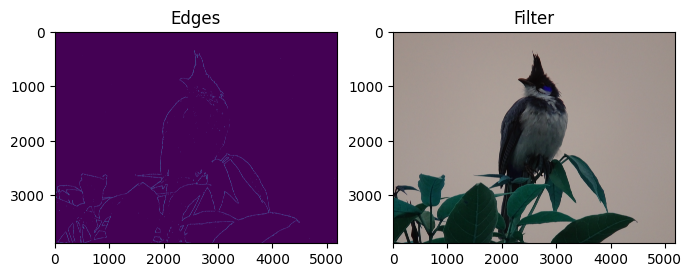

In [22]:
# Read image and extract low level features such as edges, filtering techniques

import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('/content/DSC07750.JPG')
img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_edges=cv.Canny(img,threshold1=100,threshold2=200)

img_f = np.float32(img_gray)
img_corner = cv.cornerHarris(img_f, 2,5,0.07)
img_corner = cv.dilate(img_corner, None)
img[img_corner > 0.01*img_corner.max()] = [0,0,255]

plt.subplot(1,2,1);plt.title("Edges"),plt.imshow(img_edges)
plt.subplot(1,2,2);plt.title("Filter");plt.imshow(img)

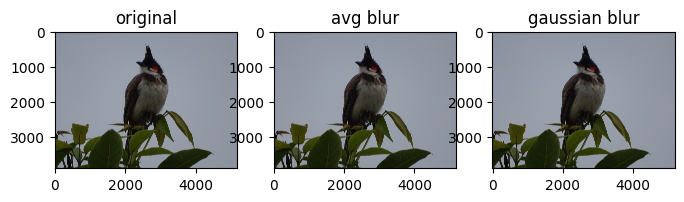

In [7]:
# WAP to blur and smoothen and image

import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('/content/DSC07750.JPG')
img_rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_avgBlur=cv.blur(img_rgb,(3,3))
img_gBlur=cv.GaussianBlur(img_rgb,(3,3),0)
images=[img_rgb,img_avgBlur,img_gBlur]
titles=['original','avg blur','gaussian blur']
for i in range(3):
    plt.subplot(1,3,i+1);plt.title(titles[i]);plt.imshow(images[i])

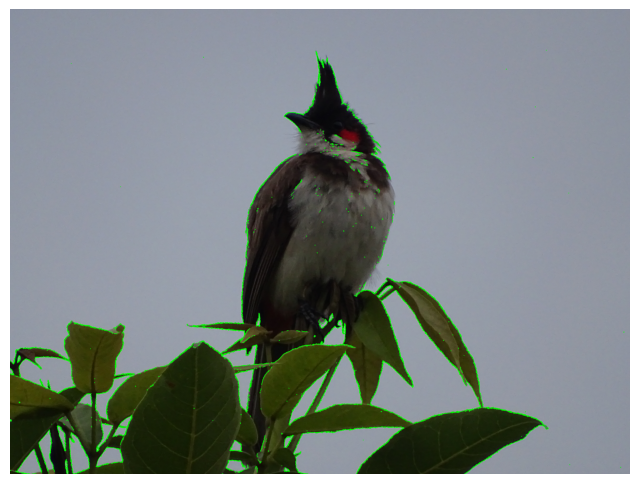

In [12]:
# WAP to contour and image

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/DSC07750.JPG')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_edges = cv.Canny(img_gray, threshold1=100, threshold2=200)
contours, hierarchy = cv.findContours(img_edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

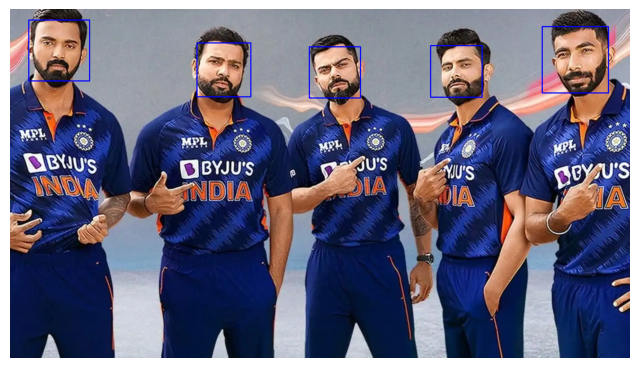

In [17]:
# WAP to detect faces in an image

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/faces.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
fc = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = fc.detectMultiScale(img_gray, 1.3, 2)
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()